<a href="https://colab.research.google.com/github/ViacheslavTimofeev/heart_attack_research/blob/main/heart_research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Чем займемся? Проект: “Предсказание вероятности сердечно-сосудистых заболеваний”

Сердечно-сосудистые заболевания (ССЗ), к сожалению, являются самой частой причиной смерти по всему миру. При этом наиболее эффективной стратегией борьбы с ССЗ является заблаговременное выявление проблем (диагностика) и своевременное начало лечения. Наша задача: В этом проекте вам предстоит помочь врачам в их повседневной работе - провести предварительную оценка медицинских данных, которыми располагает заказчик. Цель этой работы - оценить качество данных и возможность их использования для создания ML решений.

**Пояснения к данным:**

**age** - age of the person

**sex** - gender of the person

**cp** - chest pain type

**trtbps** - resting blood pressure (in mm Hg)

**chol** - cholestoral in mg/dl fetched via BMI sensor

**fbs** - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

**restecg** - resting electrocardiographic results

**thalachh** - maximum heart rate achieved

**exng** - exercise induced angina (1 = yes; 0 = no)

**oldpeak** - Previous peak

**slp** - Slope

**caa** - number of major vessels (0-3)

**thall** - Thal rate

**output** - Target variable

# **Шаг 1.** Провести разведочный анализ данных, обнаружить возможные аномалии, пропуски, выбросы. Провести предобработку данных.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   98.6    3585 non-null   float

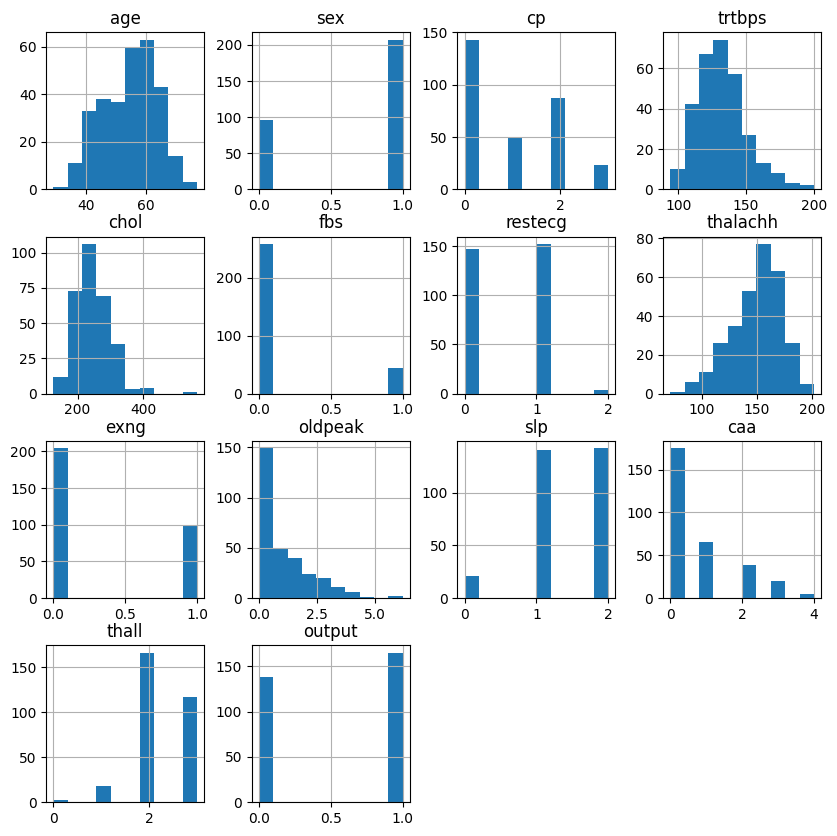

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Scaling
from sklearn.preprocessing import RobustScaler

# Train Test Split
from sklearn.model_selection import train_test_split

# Models
import torch
import torch.nn as nn
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Metrics
from sklearn.metrics import accuracy_score, classification_report, roc_curve

# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

np.random.seed(42)

heart = pd.read_csv('/content/drive/My Drive/Datasets/heart.csv')
print(heart.info())

o2 = pd.read_csv('/content/drive/My Drive/Datasets/o2Saturation.csv')
print(o2.info())

dict = {}
for i in list(heart.columns):
    dict[i] = heart[i].value_counts().shape[0] # цикл для подсчета уникальных значений каждого столбца

print(pd.DataFrame(dict, index=["unique count"]).transpose())

cat_cols = ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall'] # распределение колонок по типу данных: категориальный или
con_cols = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
targ_cols = ['output']

print(cat_cols)
print(con_cols)

print(heart[con_cols].describe().transpose())

print(heart.duplicated().value_counts()) # обнаружен 1 дубликат, решено оставить.
#print(heart.isna().sum()) # пропусков не обнаружено.
print(heart.hist(figsize=(10, 10))) # проверим данные на однородность.
print(heart['chol'].describe()) # на графике 'chol' виден один выброс
print(heart['restecg'].value_counts())
#heart = heart.drop(heart[(heart.restecg == 2) & (heart.chol > 450)].index)

# **Шаг 2.** Провести статистический анализ данных (визуализация, поиск взаимосвязей)


               age    trtbps      chol  thalachh   oldpeak
age       1.000000  0.279351  0.213678 -0.398522  0.210013
trtbps    0.279351  1.000000  0.123174 -0.046698  0.193216
chol      0.213678  0.123174  1.000000 -0.009940  0.053952
thalachh -0.398522 -0.046698 -0.009940  1.000000 -0.344187
oldpeak   0.210013  0.193216  0.053952 -0.344187  1.000000


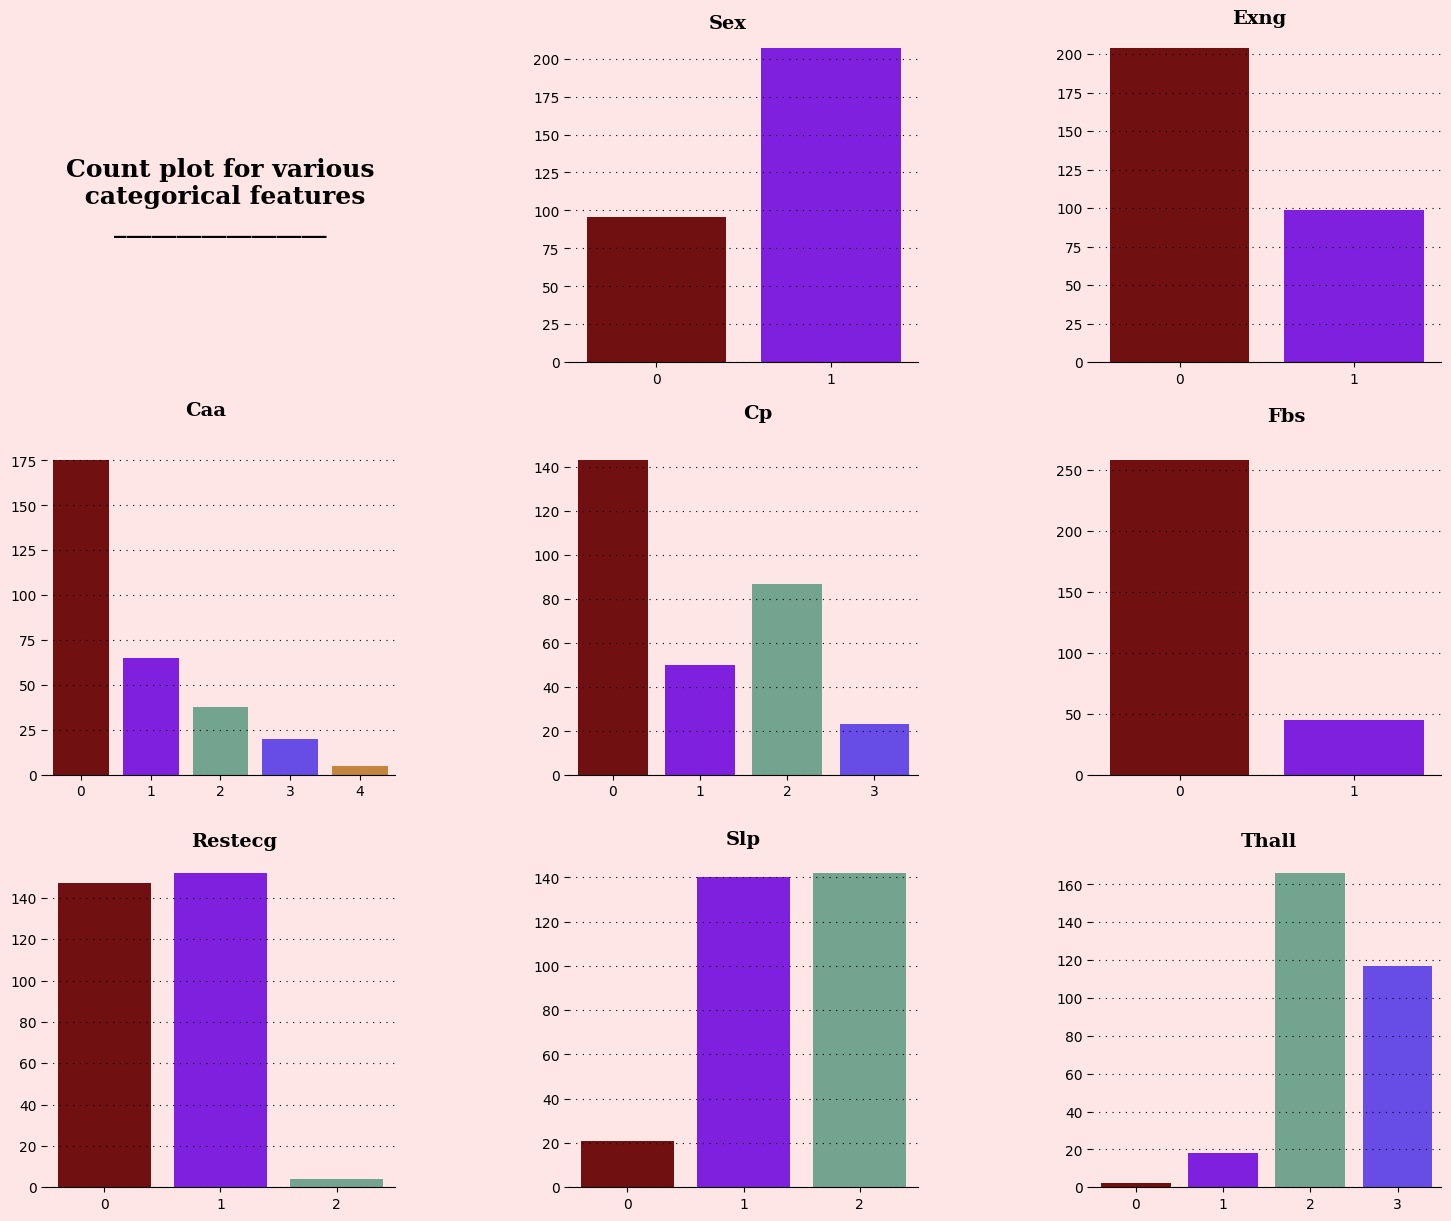

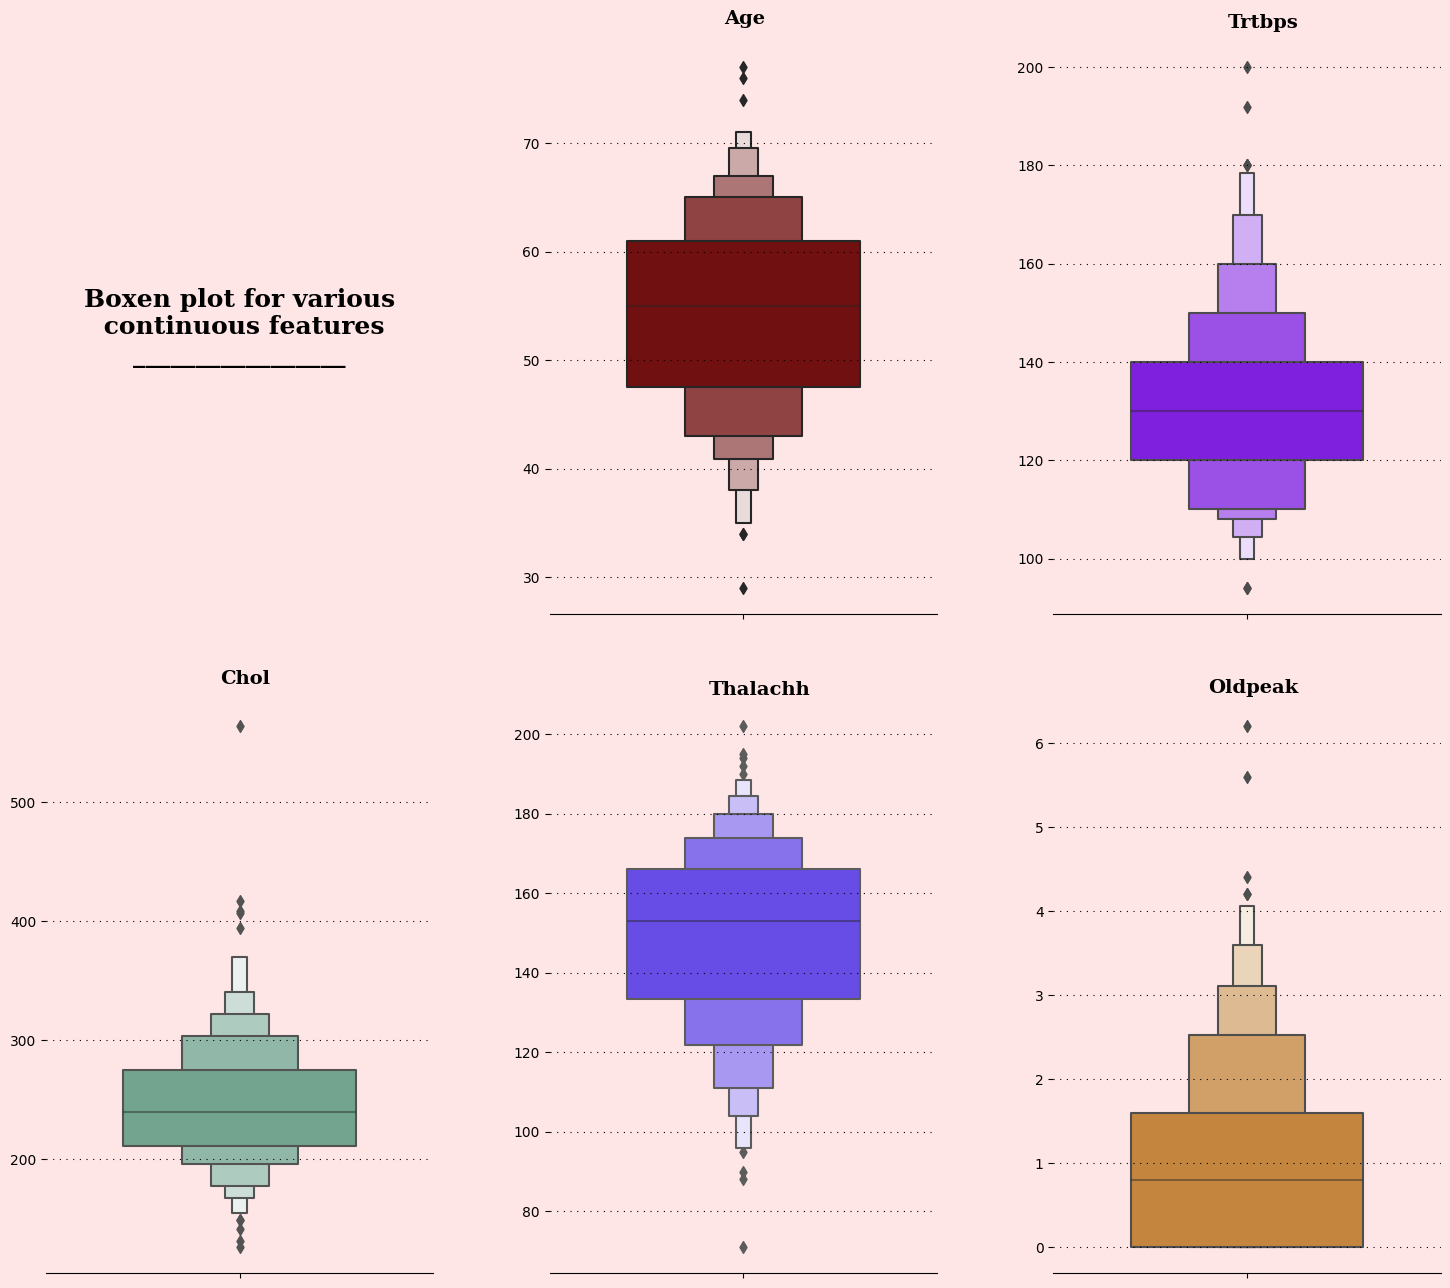

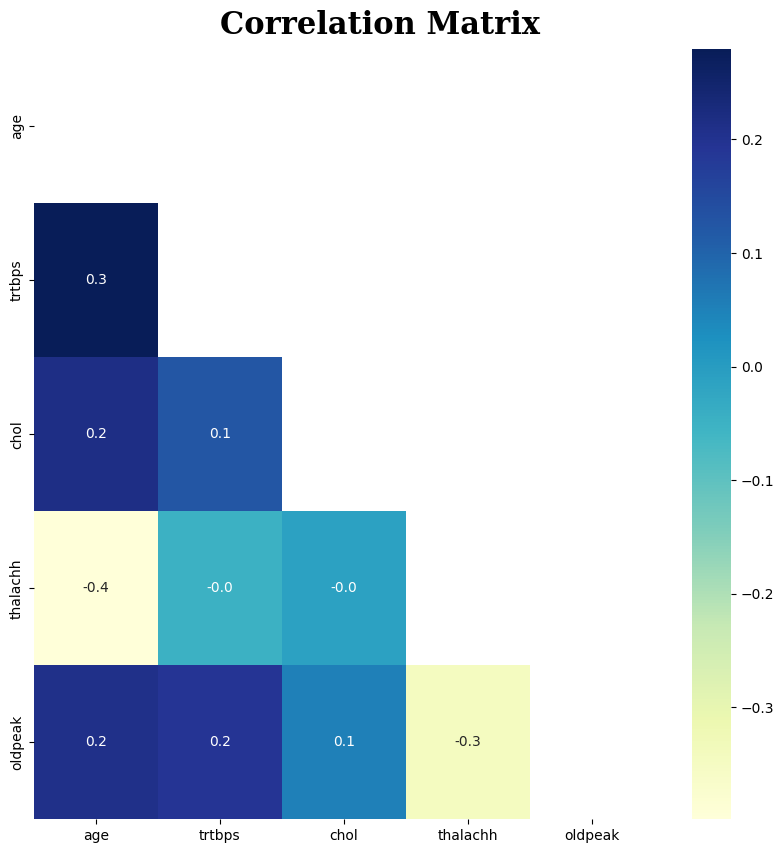

<Figure size 1200x1200 with 0 Axes>

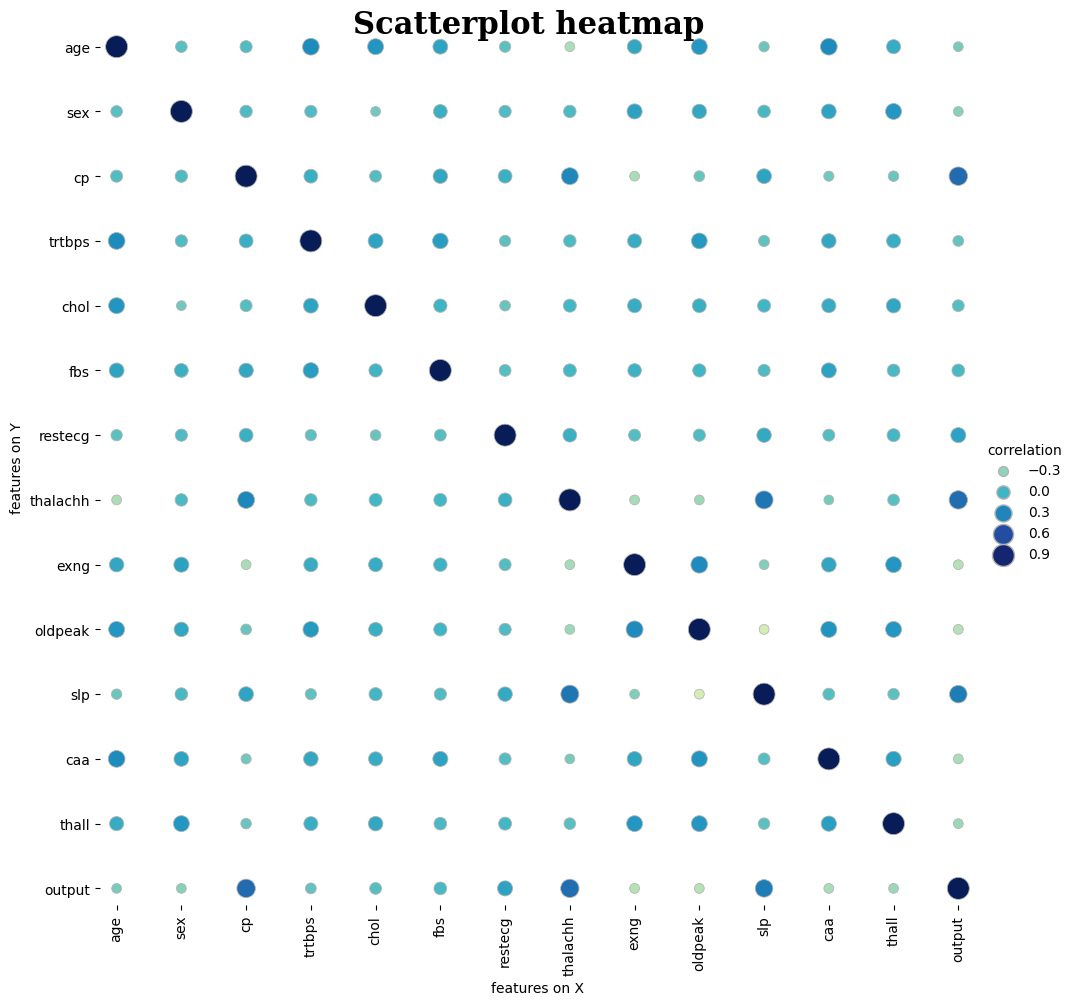

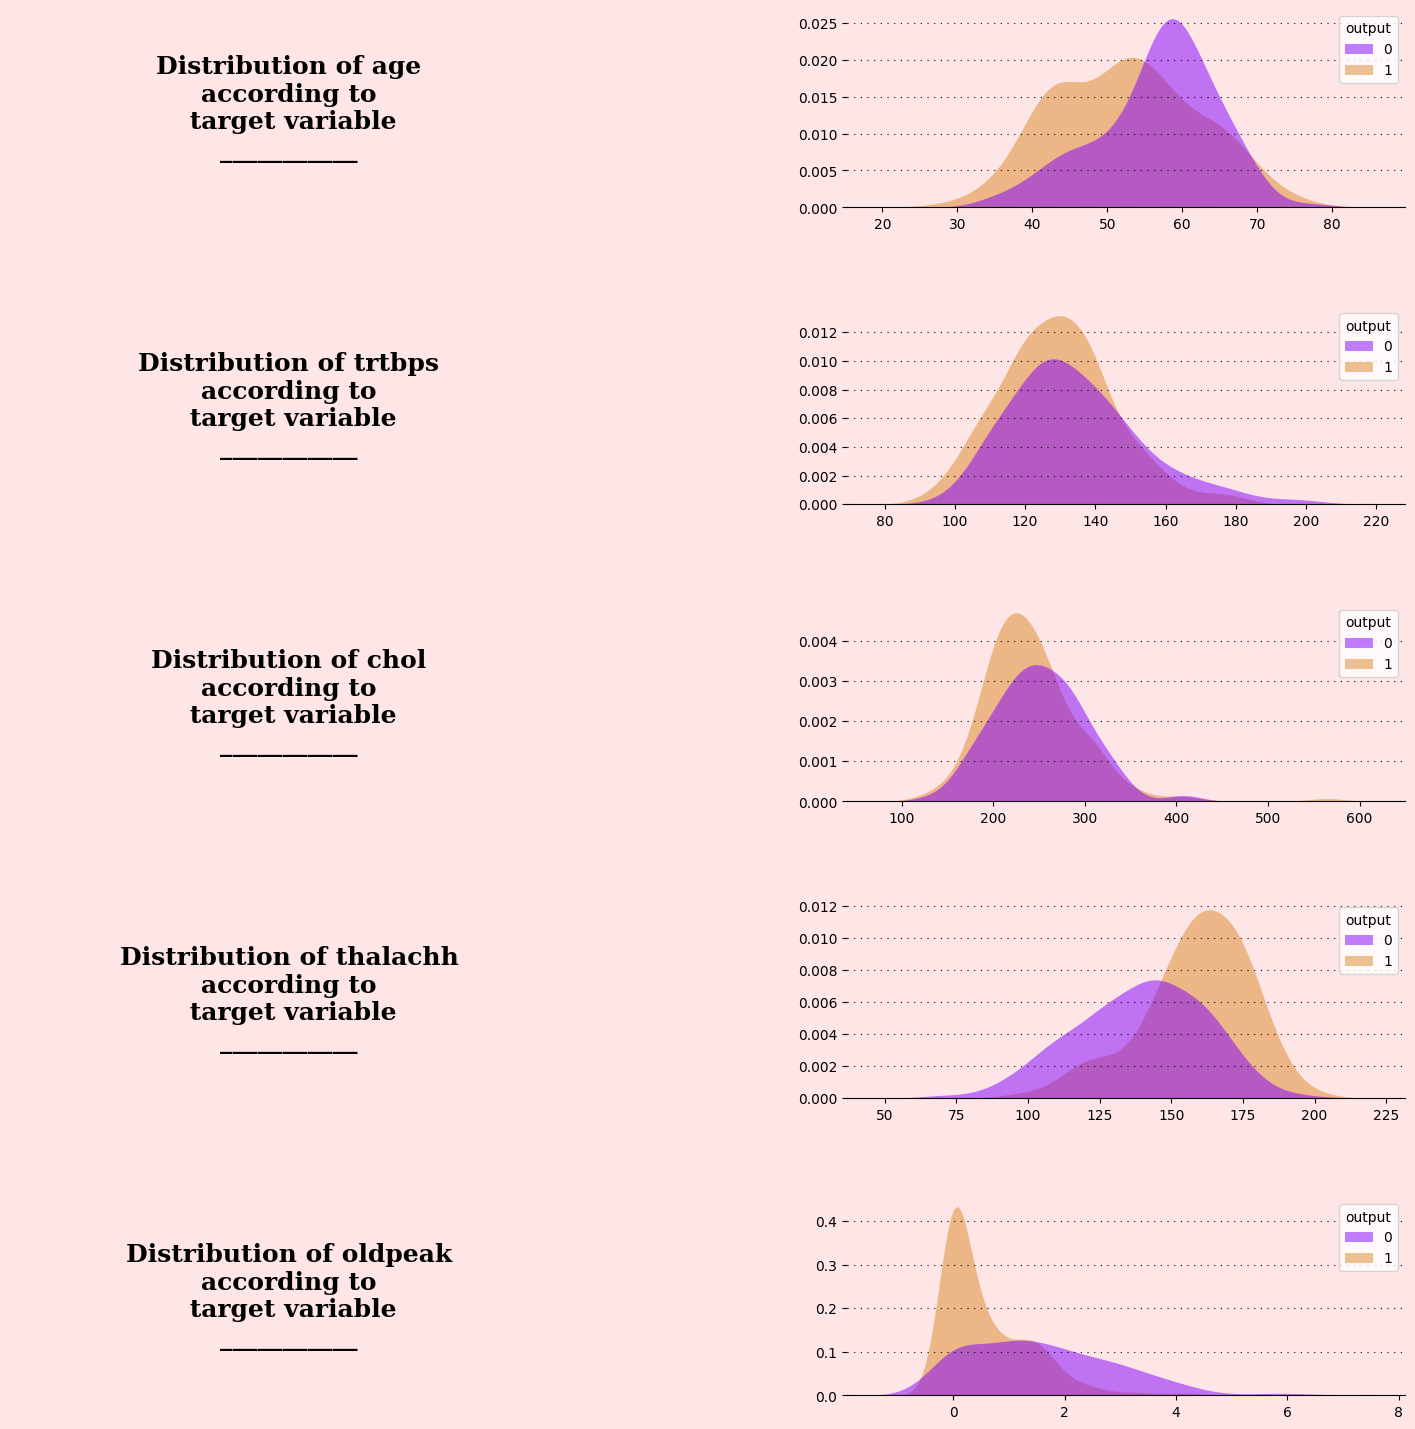

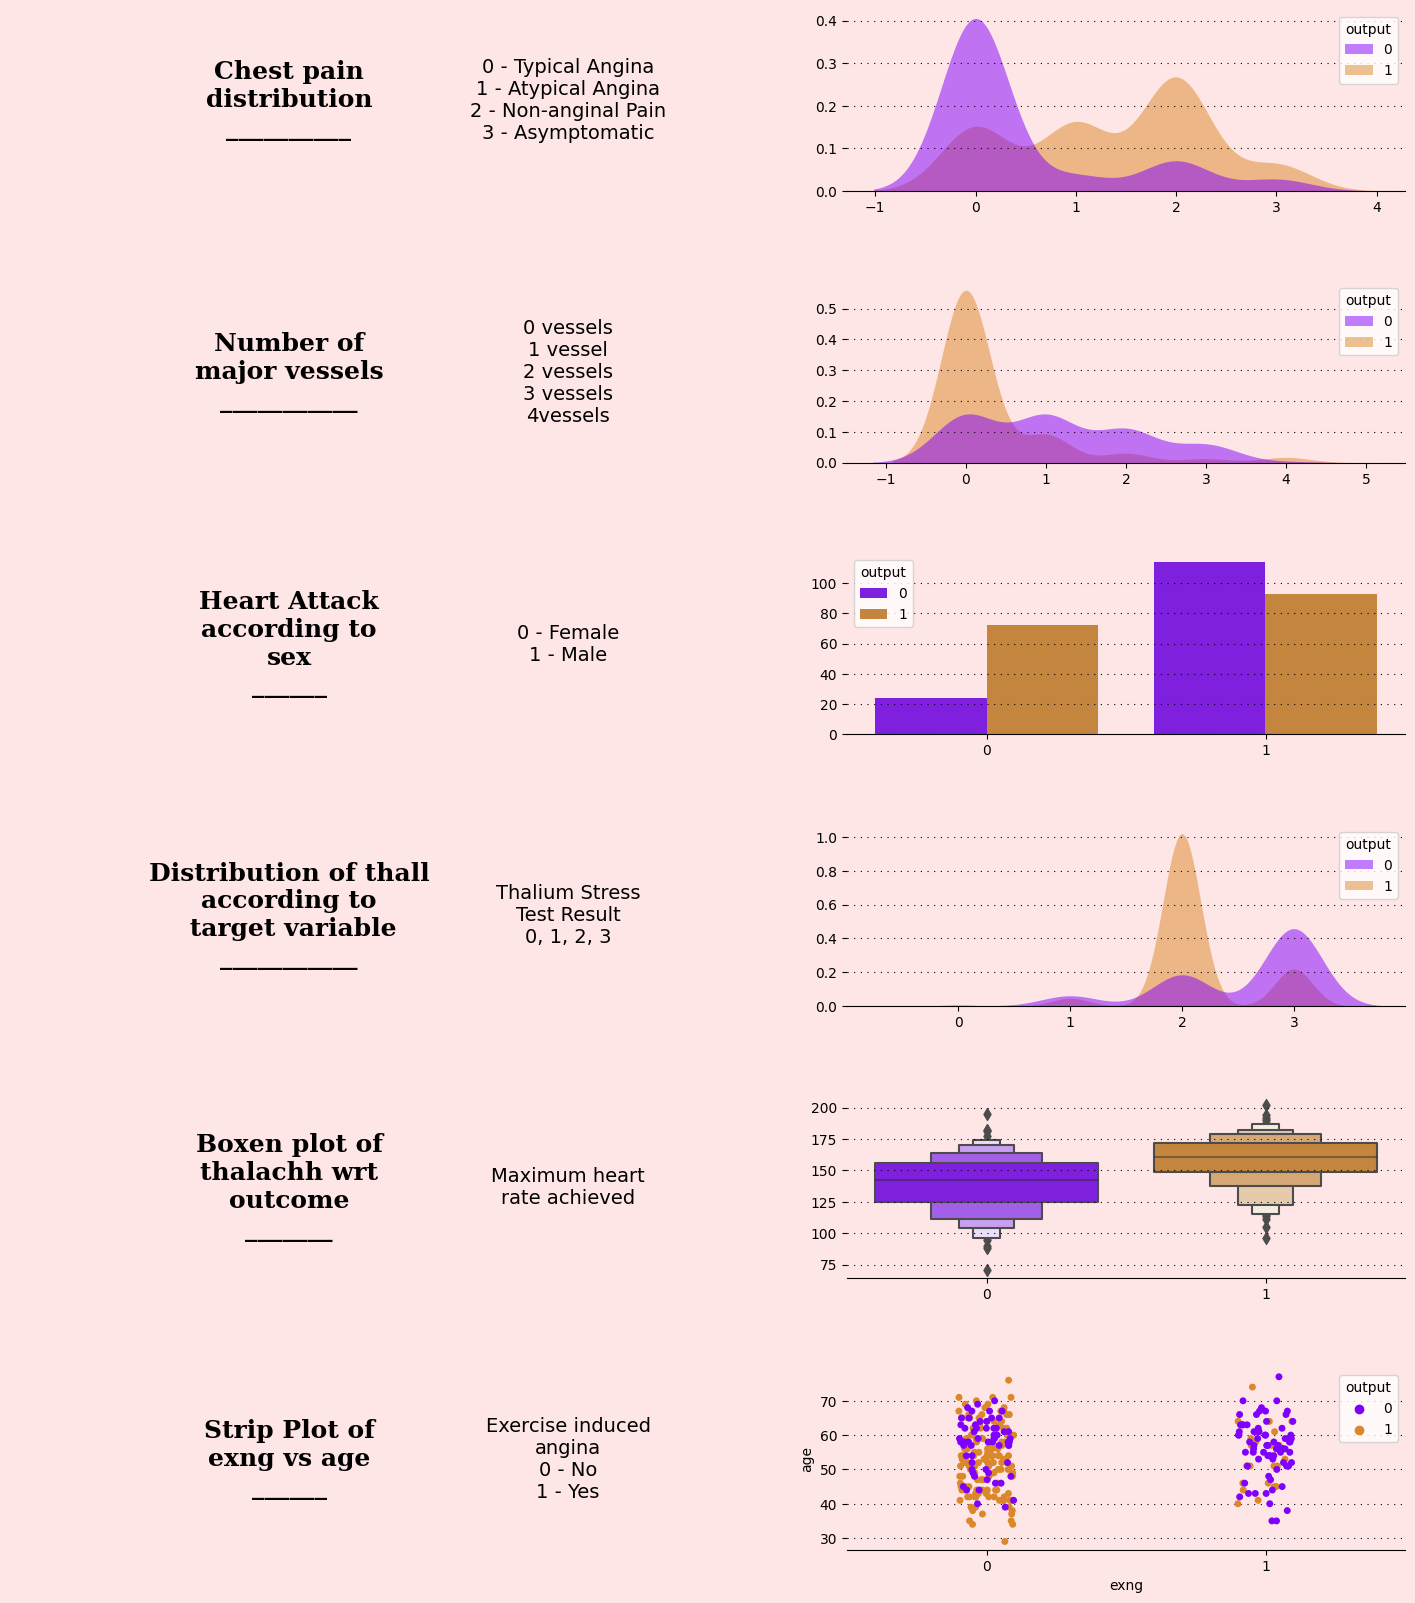

In [ ]:
# Все последующие графики взяты с источника: https://www.kaggle.com/code/namanmanchanda/heart-attack-eda-prediction-90-accuracy

# Построение гистограмм категориальных столбцов

fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])
ax6 = fig.add_subplot(gs[2,0])
ax7 = fig.add_subplot(gs[2,1])
ax8 = fig.add_subplot(gs[2,2])

background_color = "#ffe6e6"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color)
ax6.set_facecolor(background_color)
ax7.set_facecolor(background_color)
ax8.set_facecolor(background_color)

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Count plot for various\n categorical features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

# Sex count
ax1.text(0.3, 220, 'Sex', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1,data=heart,x='sex',palette=color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Exng count
ax2.text(0.3, 220, 'Exng', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax2,data=heart,x='exng',palette=color_palette)
ax2.set_xlabel("")
ax2.set_ylabel("")

# Caa count
ax3.text(1.5, 200, 'Caa', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax3,data=heart,x='caa',palette=color_palette)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Cp count
ax4.text(1.5, 162, 'Cp', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax4,data=heart,x='cp',palette=color_palette)
ax4.set_xlabel("")
ax4.set_ylabel("")

# Fbs count
ax5.text(0.5, 290, 'Fbs', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax5,data=heart,x='fbs',palette=color_palette)
ax5.set_xlabel("")
ax5.set_ylabel("")

# Restecg count
ax6.text(0.75, 165, 'Restecg', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax6.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax6,data=heart,x='restecg',palette=color_palette)
ax6.set_xlabel("")
ax6.set_ylabel("")

# Slp count
ax7.text(0.85, 155, 'Slp', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax7,data=heart,x='slp',palette=color_palette)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Thall count
ax8.text(1.2, 180, 'Thall', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax8.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax8,data=heart,x='thall',palette=color_palette)
ax8.set_xlabel("")
ax8.set_ylabel("")

for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
    ax6.spines[s].set_visible(False)
    ax7.spines[s].set_visible(False)
    ax8.spines[s].set_visible(False)


# ----------------------------------


# Построение графиков типа 'boxplot' для количественных столбцов

fig = plt.figure(figsize=(18,16))
gs = fig.add_gridspec(2,3)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])

background_color = "#ffe6e6"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color)

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Boxen plot for various\n continuous features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

# Age
ax1.text(-0.05, 81, 'Age', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax1,y=heart['age'],palette=["#800000"],width=0.6)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Trtbps
ax2.text(-0.05, 208, 'Trtbps', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax2,y=heart['trtbps'],palette=["#8000ff"],width=0.6)
ax2.set_xlabel("")
ax2.set_ylabel("")

# Chol
ax3.text(-0.05, 600, 'Chol', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax3,y=heart['chol'],palette=["#6aac90"],width=0.6)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Thalachh
ax4.text(-0.09, 210, 'Thalachh', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax4,y=heart['thalachh'],palette=["#5833ff"],width=0.6)
ax4.set_xlabel("")
ax4.set_ylabel("")

# oldpeak
ax5.text(-0.1, 6.6, 'Oldpeak', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax5,y=heart['oldpeak'],palette=["#da8829"],width=0.6)
ax5.set_xlabel("")
ax5.set_ylabel("")

for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)


# ----------------------------------


# Коэффициенты корреляции для количественных переменных
print(heart[con_cols].corr())


# График коэффициентов корреляции
fig = plt.figure(figsize=(10,10))
gs = fig.add_gridspec(1,1)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])

heart_corr = heart[con_cols].corr().transpose()
mask = np.triu(np.ones_like(heart_corr))
sns.heatmap(heart_corr,mask=mask,fmt=".1f",annot=True,cmap='YlGnBu')
color_palette = ["#5833ff","#da8829"]
ax0.text(1.5,-0.1,"Correlation Matrix",fontsize=22, fontweight='bold', fontfamily='serif', color="#000000")
plt.show()


# ----------------------------------


# График типа 'scatterplot heatmap' для коэффициентов корреляции
fig = plt.figure(figsize=(12,12))
corr_mat = heart.corr().stack().reset_index(name="correlation")
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="YlGnBu", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)
g.set(xlabel="features on X", ylabel="features on Y", aspect="equal")
g.fig.suptitle('Scatterplot heatmap',fontsize=22, fontweight='bold', fontfamily='serif', color="#000000")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")
plt.show()


# ----------------------------------


# Графики распределения количественных переменных относительно целевого признака.
fig = plt.figure(figsize=(18,18))
gs = fig.add_gridspec(5,2)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])
ax8 = fig.add_subplot(gs[4,0])
ax9 = fig.add_subplot(gs[4,1])

background_color = "#ffe6e6"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color)
ax6.set_facecolor(background_color)
ax7.set_facecolor(background_color)
ax8.set_facecolor(background_color)
ax9.set_facecolor(background_color)

# Age title
ax0.text(0.5,0.5,"Distribution of age\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax0.spines["bottom"].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

# Age
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax1, data=heart, x='age',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax1.set_xlabel("")
ax1.set_ylabel("")

# TrTbps title
ax2.text(0.5,0.5,"Distribution of trtbps\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax2.spines["bottom"].set_visible(False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.tick_params(left=False, bottom=False)

# TrTbps
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax3, data=heart, x='trtbps',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Chol title
ax4.text(0.5,0.5,"Distribution of chol\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax4.spines["bottom"].set_visible(False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.tick_params(left=False, bottom=False)

# Chol
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax5, data=heart, x='chol',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax5.set_xlabel("")
ax5.set_ylabel("")

# Thalachh title
ax6.text(0.5,0.5,"Distribution of thalachh\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax6.spines["bottom"].set_visible(False)
ax6.set_xticklabels([])
ax6.set_yticklabels([])
ax6.tick_params(left=False, bottom=False)

# Thalachh
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax7, data=heart, x='thalachh',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Oldpeak title
ax8.text(0.5,0.5,"Distribution of oldpeak\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax8.spines["bottom"].set_visible(False)
ax8.set_xticklabels([])
ax8.set_yticklabels([])
ax8.tick_params(left=False, bottom=False)

# Oldpeak
ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax9, data=heart, x='oldpeak',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax9.set_xlabel("")
ax9.set_ylabel("")

for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)
    ax6.spines[i].set_visible(False)
    ax7.spines[i].set_visible(False)
    ax8.spines[i].set_visible(False)
    ax9.spines[i].set_visible(False)


# ----------------------------------


# Другие взаимосвязи переменных с целевым признаком
fig = plt.figure(figsize=(18,20))
gs = fig.add_gridspec(6,2)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])
ax8 = fig.add_subplot(gs[4,0])
ax9 = fig.add_subplot(gs[4,1])
ax10 = fig.add_subplot(gs[5,0])
ax11 = fig.add_subplot(gs[5,1])

background_color = "#ffe6e6"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color)
ax6.set_facecolor(background_color)
ax7.set_facecolor(background_color)
ax8.set_facecolor(background_color)
ax9.set_facecolor(background_color)
ax10.set_facecolor(background_color)
ax11.set_facecolor(background_color)

# Cp title
# 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic
ax0.text(0.5,0.5,"Chest pain\ndistribution\n__________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax0.spines["bottom"].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)
ax0.text(1,.5,"0 - Typical Angina\n1 - Atypical Angina\n2 - Non-anginal Pain\n3 - Asymptomatic",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )

# Cp
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax1, data=heart, x='cp',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Caa title
ax2.text(0.5,0.5,"Number of\nmajor vessels\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax2.text(1,.5,"0 vessels\n1 vessel\n2 vessels\n3 vessels\n4vessels",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )

ax2.spines["bottom"].set_visible(False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.tick_params(left=False, bottom=False)

# Caa
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax3, data=heart, x='caa',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Sex title
ax4.text(0.5,0.5,"Heart Attack\naccording to\nsex\n______",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax4.text(1,.5,"0 - Female\n1 - Male",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )
ax4.spines["bottom"].set_visible(False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.tick_params(left=False, bottom=False)

# Sex
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax5,data=heart,x='sex',palette=["#8000ff","#da8829"], hue='output')
ax5.set_xlabel("")
ax5.set_ylabel("")

# Thall title
ax6.text(0.5,0.5,"Distribution of thall\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax6.text(1,.5,"Thalium Stress\nTest Result\n0, 1, 2, 3",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )
ax6.spines["bottom"].set_visible(False)
ax6.set_xticklabels([])
ax6.set_yticklabels([])
ax6.tick_params(left=False, bottom=False)

# Thall
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax7, data=heart, x='thall',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Thalachh title
ax8.text(0.5,0.5,"Boxen plot of\nthalachh wrt\noutcome\n_______",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax8.text(1,.5,"Maximum heart\nrate achieved",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )

ax8.spines["bottom"].set_visible(False)
ax8.set_xticklabels([])
ax8.set_yticklabels([])
ax8.tick_params(left=False, bottom=False)

# Thalachh
ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax9, data=heart,x='output',y='thalachh',palette=["#8000ff","#da8829"])
ax9.set_xlabel("")
ax9.set_ylabel("")



# Exng title
ax10.text(0.5,0.5,"Strip Plot of\nexng vs age\n______",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax10.text(1,.5,"Exercise induced\nangina\n0 - No\n1 - Yes",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )
ax10.spines["bottom"].set_visible(False)
ax10.set_xticklabels([])
ax10.set_yticklabels([])
ax10.tick_params(left=False, bottom=False)


# Exng
ax11.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.stripplot(ax=ax11, data=heart,x='exng',y='age',hue='output',palette=["#8000ff","#da8829"])
ax9.set_xlabel("")
ax9.set_ylabel("")

for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)
    ax6.spines[i].set_visible(False)
    ax7.spines[i].set_visible(False)
    ax8.spines[i].set_visible(False)
    ax9.spines[i].set_visible(False)
    ax10.spines[i].set_visible(False)
    ax11.spines[i].set_visible(False)

# **Шаг 3**. Предварительная обработка данных
## **Выводы из 2 шага**

1. В датасете нет значений типа NaN
2. Нет выделяющихся выбросов среди количественных переменных
3. Людей типа sex = 1 больше в 2 раза, чем людей типа sex = 0.
4. Нет очевидных линейных зависимостей между количественными переменными согласно графику 'scatterplot heatmap'.
5. По графику 'scatterplot heatmap' можно предположить о возможной зависимости между переменными 'output' и 'cp', и 'thalachh' и 'slp'.
6. Кажется очевидным, более старшие люди имеют больше шансов получить инфаркт, однако, согласно графику распределения возраста относительно целевого признака 'output', наибольшее количество инфарктов приходится на отметку 58-60 лет, после чего шансы снижаются.
7. Согласно графику распределения переменной 'thalachh' относительно целевого признака 'output', люди с учащенным сердцебиением имеют более высокие шансы получить инфаркт (нормальным темпом биения сердца считать 60-100 ударов в минуту).
8. Согласно графику распределения переменной 'oldpeak' относительно целевого признака 'output', люди, имевшие меньшую максимальную частоту сердцебиения в прошлом, имеют более высокие шансы получить инфаркт.

## **График других взимосвязей говорит о следующем:**

* Люди с не-ангинальной болью в груди(cp = 2) имеют более высокие шансы получить инфаркт.
* Люди из категории caa = 0 имеют более высокие шансы получить инфаркт.
* Люди с полом sex = 1 имеют более высокие шансы получить инфаркт.
* Люди из категории thall = 2 имеют более высокие шансы получить инфаркт.
* Люди с ангиной, вызываемой физическими нагрузками или упражнениями (exng = 0), имеют более высокие шансы получить инфаркт.






In [ ]:
# Создадим копию датафрейма
heart1 = heart

# Определим колонки для one-hot encoding и масштабирования
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]

# Кодируем категориальные признаки
df1 = pd.get_dummies(heart1, columns = cat_cols, drop_first = True)

# Определяем признаки и целевой признак
X = heart1.drop(['output'],axis=1)
y = heart1[['output']]

# Инициализируем scaler
scaler = RobustScaler()

# Масштабируем количественные признаки
X[con_cols] = scaler.fit_transform(X[con_cols])
print("The first 5 rows of X are")
X.head()

# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
print("The shape of X_train is      ", X_train.shape)
print("The shape of X_test is       ",X_test.shape)
print("The shape of y_train is      ",y_train.shape)
print("The shape of y_test is       ",y_test.shape)



The first 5 rows of X are
The shape of X_train is       (242, 13)
The shape of X_test is        (61, 13)
The shape of y_train is       (242, 1)
The shape of y_test is        (61, 1)


# **Шаг 4**. Построение моделей


The test accuracy score of SVM is  0.8688524590163934
The best params are : {'C': 6, 'gamma': 0.05}
The best score is   : 0.8388605442176871
The test accuracy score of SVM after hyper-parameter tuning is  0.8360655737704918
The test accuracy score of Logistric Regression is  0.8524590163934426


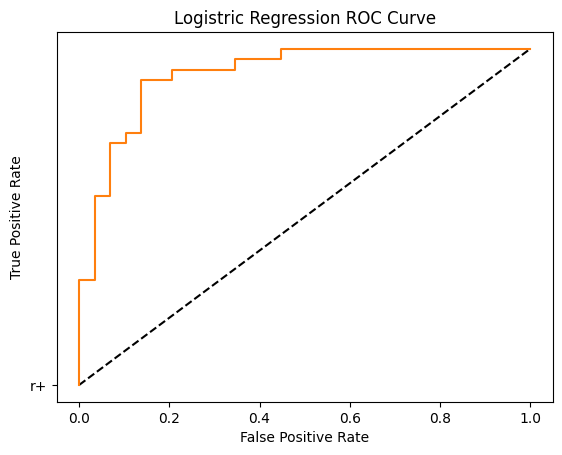

The test accuracy score of Decision Tree is  0.7540983606557377
The test accuracy score of Random Forest is  0.7540983606557377
The test accuracy score of Gradient Boosting Classifier is  0.8688524590163934


In [ ]:
# Линейные классификаторы

# Support Vector Machines (SVC)
# instantiating the object and fitting
clf = SVC(kernel='linear', C=1, random_state=42).fit(X_train,y_train)

# predicting the values
y_pred = clf.predict(X_test)

# Accuracy score без настройки гиперпараметров
print("The test accuracy score of SVM is ", accuracy_score(y_test, y_pred))


# Настройка гиперпараметров
# instantiating the object
svm = SVC()

# setting a grid - not so extensive
parameters = {"C":np.arange(1,10,1),'gamma':[0.00001,0.00005, 0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,5]}

# instantiating the GridSearchCV object
searcher = GridSearchCV(svm, parameters)

# fitting the object
searcher.fit(X_train, y_train)

# the scores
print("The best params are :", searcher.best_params_)
print("The best score is   :", searcher.best_score_)

# predicting the values
y_pred = searcher.predict(X_test)

# Accuracy score после настройки гиперпараметров
print("The test accuracy score of SVM after hyper-parameter tuning is ", accuracy_score(y_test, y_pred))



# Логистическая регрессия
# instantiating the object
logreg = LogisticRegression()

# fitting the object
logreg.fit(X_train, y_train)

# calculating the probabilities
y_pred_proba = logreg.predict_proba(X_test)

# finding the predicted valued
y_pred = np.argmax(y_pred_proba,axis=1)

# printing the test accuracy
print("The test accuracy score of Logistric Regression is ", accuracy_score(y_test, y_pred))


# Построение AOC-ROC кривой
# calculating the probabilities
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# instantiating the roc_cruve
fpr,tpr,threshols=roc_curve(y_test,y_pred_prob)

# plotting the curve
plt.plot([0,1],[0,1],"k--",'r+')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistric Regression ROC Curve")
plt.show()


# ----------------------------------


# Классификаторы типа 'дерево'

# DecisionTreeClassifier
# instantiating the object
dt = DecisionTreeClassifier(random_state = 42)

# fitting the model
dt.fit(X_train, y_train)

# calculating the predictions
y_pred = dt.predict(X_test)

# printing the test accuracy
print("The test accuracy score of Decision Tree is ", accuracy_score(y_test, y_pred))


# RandomForestClassifier
# instantiating the object
rf = RandomForestClassifier()

# fitting the model
rf.fit(X_train, y_train)

# calculating the predictions
y_pred = dt.predict(X_test)

# printing the test accuracy
print("The test accuracy score of Random Forest is ", accuracy_score(y_test, y_pred))


# GradientBoostingClassifier, без настройки
# instantiate the classifier
gbt = GradientBoostingClassifier(n_estimators = 300,max_depth=1,subsample=0.8,max_features=0.2,random_state=42)

# fitting the model
gbt.fit(X_train,y_train)

# predicting values
y_pred = gbt.predict(X_test)
print("The test accuracy score of Gradient Boosting Classifier is ", accuracy_score(y_test, y_pred))